## Extracting maximum business value through intensive data analysis, by Javier Marti

# Analyzing a dataset of limited HR data from +11.000 employees, extracting information from the numbers in order to make timely and effective managerial decisions.
What are the numbers trying to tell us? This analysis will let us dive into the number to get important information on the past strategy of this company. I will also point to potential areas of improvement and others that require further investigation, based on the numbers presented here.
We shall proceed to clean the data first, and then to extract conclusions from it.

# The data we must extract info from is quite limited in scope. We are not given detailed information about the company, its past strategy, the timeline of certain events, employees motivations, personalities or department dynamics. In any case, our job as data analysts is to get the most information out of this limited dataset.

In [42]:
import pandas as pd
import numpy as np
%matplotlib inline
hr = pd.read_csv('HR_comma_sep.csv')
#Let's see how data is organized and looks like
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [43]:
#What type of data is on each column?
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Data wrangling: initiating data cleaning operation...

In [44]:
#Checking for NaN values
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [45]:
#Checking for duplicates
hr.duplicated().value_counts()

False    11991
True      3008
dtype: int64

In [46]:
#Removing duplicates
hr.drop_duplicates(keep = 'first').shape

(11991, 10)

In [47]:
#Verifying deletion
hr.duplicated().value_counts()

False    11991
True      3008
dtype: int64

In [48]:
#Ensuring all duplicates are dropped
hr.drop_duplicates(inplace = True)

In [49]:
#renaming column 'sales' to 'department'
hr.columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'left', 'promotion_last_5years', 'department', 'salary']

# First dive into the data...

In [50]:
hr.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991,11991
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3239,5740
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,NaN,NaN
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


# Several things catch our attention from the previous operation, and may warrant further investigation...
- 14.4% of workers have had an accident or a work-related incident. Do safety measures need to be revamped?
- Only 1.6% of workers have had a promotion in the last 5 years. We should investigate our career development policies.
- There is a 16% average turnover in the company. What is causing this? A survey of employees may be a good idea.
- Some worker/s appear to have worked up to 310h in a month. Was he/she an outlier? Further investigation required.
- The person who has spent the most time in the company has been an employee for less than 10 years. This may be a good or a bad sign, depending on our industry and our business strategy.
- Some person/s express a satisfaction level of only 9%. Was this an outlier? Together with the 16% worker turnover, we should investigate both of these issues.

In [51]:
#How many unique workers in this dataset? 11991
hr.index.unique()

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            11990, 11991, 11992, 11993, 11994, 11995, 11996, 11997, 11998,
            11999],
           dtype='int64', length=11991)

In [52]:
#Extra verification for missing values
hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

# SAFETY FIRST: Could work accidents be correlated to any other variable? The data below indicates that there's no significant correlation of "work accidents" with any other variable...
We also discover that there's no significant correlation between the last promotion had and having left the company, or between any other variable. The correlations present in this dataset could be considered "very weak" (range 0.00-0.19)

In [53]:
def color_negative_red(val):
    color = 'blue' if val > 0.3 else 'black'
    return 'color: %s' % color

hr.corr().style.applymap(color_negative_red)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1,0.095186,-0.133246,-0.00625235,-0.152915,0.0399403,-0.350558,0.0197892
last_evaluation,0.095186,1,0.270256,0.264678,0.0968286,-0.00569538,0.0135199,-0.00720636
number_project,-0.133246,0.270256,1,0.331516,0.188837,-0.0056124,0.0309276,-0.000544073
average_montly_hours,-0.00625235,0.264678,0.331516,1,0.102875,-0.0128596,0.0704093,-0.00496352
time_spend_company,-0.152915,0.0968286,0.188837,0.102875,1,2.53306e-06,0.173295,0.0568278
work_accident,0.0399403,-0.00569538,-0.0056124,-0.0128596,2.53306e-06,1,-0.125436,0.0298521
left,-0.350558,0.0135199,0.0309276,0.0704093,0.173295,-0.125436,1,-0.0446573
promotion_last_5years,0.0197892,-0.00720636,-0.000544073,-0.00496352,0.0568278,0.0298521,-0.0446573,1


# As we see below, out of 2000 employees having had a work accident in the period observed, only 169 eventually left the company 

In [54]:
print(hr[(hr['work_accident']==1) & (hr['left']==0)].count())[5:6]
print(hr[(hr['work_accident']==1) & (hr['left']==1)].count())[5:6]

work_accident    1745
dtype: int64
work_accident    105
dtype: int64


# Next, grouping our data by departments we discover the following interesting information...
(refer to table below for exact information)
Conclusions:
- Work accidents % are high across every department in the company. This is highly unusual and warrants further investigation
- There are employees working more than 300h a month in every department. Are these individuals performing at their best or risking earlier burn-out?
- There are high levels of turnover in the HR, sales, support and technical departments, ranging from 25% to 29% in HR.
- The min and max number of projects for each department is suspiciously uniform. This could be due to faulty data or a rigid work assignment policy, which may not work in the benefit of the company
- Averages of promotions in the last 5 years in this company have been notoriously low across all departments
- Interestingly, nobody has been promoted in the last 5 years in the product_mng department. Did none of the members of the team deserve a promotion or is the company failing to promote from within?
- Despite the lack of promotions, satisfaction levels are stable across all deparments, hovering around the 60% mark
- The average stay in the company for each department is around 3 years, with the MNG department presenting the highest variation in standard deviation (2.425715), in some cases doubling the average of other departments

In [55]:
#we also change the orientation of the data (transpose), to see it more clearly
hr.groupby('department').describe().T

department                           IT       RandD  accounting          hr  \
average_montly_hours  count  976.000000  694.000000  621.000000  601.000000   
                      mean   200.638320  201.291066  200.877617  199.371048   
                      std     49.452109   48.155340   49.474541   48.466969   
                      min     96.000000   98.000000   97.000000   98.000000   
                      25%    160.000000  161.000000  156.000000  155.000000   
                      50%    197.000000  199.500000  199.000000  198.000000   
                      75%    244.000000  247.000000  246.000000  241.000000   
                      max    308.000000  308.000000  310.000000  310.000000   
last_evaluation       count  976.000000  694.000000  621.000000  601.000000   
                      mean     0.715051    0.712983    0.721900    0.715691   
                      std      0.162254    0.164317    0.168196    0.169209   
                      min      0.370000    0.360000    0.360000    0.370000   
                      25%      0.570000    0.570000    0.570000    0.560000   
                      50%      0.715000    0.710000    0.730000    0.730000   
                      75%      0.860000    0.860000    0.860000    0.860000   
                      max      1.000000    1.000000    1.000000    1.000000   
left                  count  976.000000  694.000000  621.000000  601.000000   
                      mean     0.161885    0.122478    0.175523    0.188020   
                      std      0.368534    0.328074    0.380721    0.391054   
                      min      0.000000    0.000000    0.000000    0.000000   
                      25%      0.000000    0.000000    0.000000    0.000000   
                      50%      0.000000    0.000000    0.000000    0.000000   
                      75%      0.000000    0.000000    0.000000    0.000000   
                      max      1.000000    1.000000    1.000000    1.000000   
number_project        count  976.000000  694.000000  621.000000  601.000000   
                      mean     3.797131    3.850144    3.834138    3.675541   
                      std      1.163475    1.132247    1.163917    1.134115   
                      min      2.000000    2.000000    2.000000    2.000000   
                      25%      3.000000    3.000000    3.000000    3.000000   
                      50%      4.000000    4.000000    4.000000    4.000000   
...                                 ...         ...         ...         ...   
promotion_last_5years std      0.045245    0.171424    0.125973    0.134156   
                      min      0.000000    0.000000    0.000000    0.000000   
                      25%      0.000000    0.000000    0.000000    0.000000   
                      50%      0.000000    0.000000    0.000000    0.000000   
                      75%      0.000000    0.000000    0.000000    0.000000   
                      max      1.000000    1.000000    1.000000    1.000000   
satisfaction_level    count  976.000000  694.000000  621.000000  601.000000   
                      mean     0.634016    0.627176    0.607939    0.621947   
                      std      0.239337    0.240247    0.244739    0.241492   
                      min      0.090000    0.090000    0.090000    0.090000   
                      25%      0.490000    0.490000    0.440000    0.450000   
                      50%      0.660000    0.660000    0.640000    0.640000   
                      75%      0.820000    0.820000    0.810000    0.820000   
                      max      1.000000    1.000000    1.000000    1.000000   
time_spend_company    count  976.000000  694.000000  621.000000  601.000000   
                      mean     3.350410    3.319885    3.404187    3.256240   
                      std      1.300162    1.180032    1.287376    1.122897   
                      min      2.000000    2.000000    2.000000    2.000000   
                      25%      3.000000    3.00000

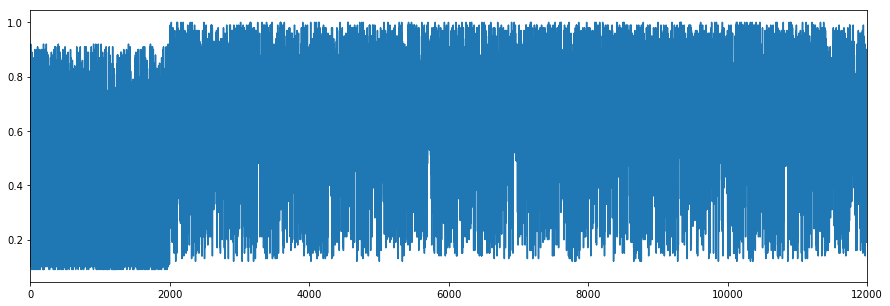

In [56]:
#On average, how happy are employees of this company, according to the data? (1.0 means 100% satisfaction)
hr['satisfaction_level'].plot(figsize = (15,5))

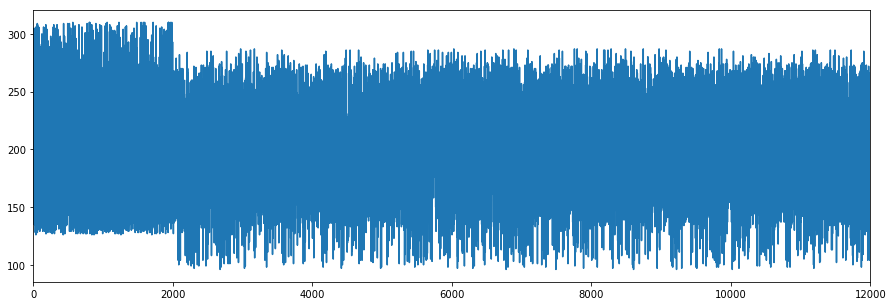

In [57]:
#How many hours are employees working?
hr['average_montly_hours'].plot(figsize = (15,5))

In [58]:
#More data on hours worked...
hr['average_montly_hours'].describe()

count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: average_montly_hours, dtype: float64

low       5740
medium    5261
high       990
Name: salary, dtype: int64
low       0.478692
medium    0.438746
high      0.082562
Name: salary, dtype: float64
Axes(0.125,0.125;0.775x0.755)


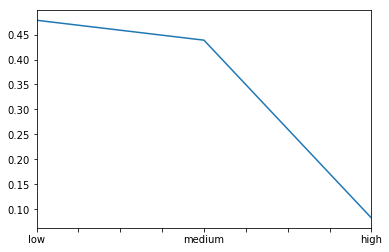

In [59]:
#What is the distribution of salaries like in this company? 48% "Low", 42% "Medium" and 8% "High"
print(hr.salary.value_counts())
print(hr.salary.value_counts(normalize=True))
print(hr.salary.value_counts(normalize=True)).plot()

In [60]:
#What percentage of employees in each department earn a high, medium or low salary?
pd.crosstab(hr.department, hr.salary).apply(lambda r: r/r.sum(), axis=1)

salary,high,low,medium
department,,,
IT,0.072746,0.487705,0.439549
RandD,0.067723,0.463977,0.468300
accounting,0.101449,0.476651,0.421900
hr,0.063228,0.492512,0.444260
management,0.293578,0.318807,0.387615
marketing,0.092125,0.460624,0.447251
product_mng,0.075802,0.500000,0.424198
sales,0.073171,0.479469,0.447360
support,0.069193,0.476112,0.454695


# How many employees at each salary bracket have left the company in the period observed? 82 high salary, 1317 medium salary and 2172 from the low salary bracket. 
Salary may not be the only reason, but clearly the more an employee earns, the less likely they are to leave this company

In [61]:
print(hr[(hr['salary']== 'high') & (hr['left']==1)].count())[9:10]
print(hr[(hr['salary']== 'medium') & (hr['left']==1)].count())[9:10]
print(hr[(hr['salary']== 'low') & (hr['left']==1)].count())[9:10]

salary    48
dtype: int64
salary    769
dtype: int64
salary    1174
dtype: int64


# 1021 employees with a "satisfaction level" above 50% have left the company in the period observed. This is a worrying trend that should be investigated by management.
Either employees are misrepresenting their satisfaction levels to the company, or the data gathered is incorrect.

In [62]:
#How many employees with a high satisfaction score have left the company?
hr[(hr['satisfaction_level']> 0.5) & (hr['left']==1)].count()

satisfaction_level       577
last_evaluation          577
number_project           577
average_montly_hours     577
time_spend_company       577
work_accident            577
left                     577
promotion_last_5years    577
department               577
salary                   577
dtype: int64

# Based on our analysis of the data provided, we suggest further investigation onto the points raised, as well as the implementation of effective channels to obtain truthful and timely information from employees, for our conclusions and data analysis will only be as good as the data we initially feed into it.